In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
!locate gp2


/lib/modules/5.4.0-104-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-104-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/raid/alphafold_data3/pdb_mmcif/mmcif_files/1gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/3gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/4gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/6gp2.cif
/usr/src/linux-headers-5.4.0-104/include/linux/input/gp2ap002a00f.h
/usr/src/linux-headers-5.4.0-104-generic/include/config/gp2ap020a00f.h
/usr/src/linux-headers-5.4.0-104-generic/include/config/input/gp2a.h
/usr

In [4]:

R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmp4v56y6czGP2
Verbose mode active!


In [6]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/siim/png_images.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/siim/png_masks.npy')

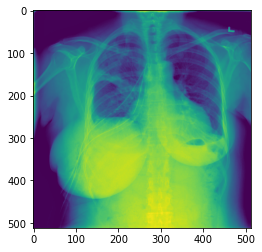

In [18]:
plt.imshow(images[1300])

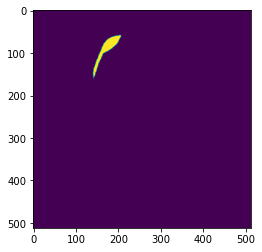

In [19]:
plt.imshow(masks[1300])

In [8]:
len(images)

12047

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
#
#
R.setup_data(images[:100], masks[:100], dataset_size=100, weights=weights)

Weights OK!


In [11]:
RUNS = 3

In [12]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 1.0550 - dice_coeff: 0.6416

1/1 [==============================] - 49s 49s/step - loss: 1.0550 - dice_coeff: 0.6416 - val_loss: 1.5617 - val_dice_coeff: 0.2674
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: -0.6680 - dice_coeff: 0.9802

1/1 [==============================] - 43s 43s/step - loss: -0.6680 - dice_coeff: 0.9802 - val_loss: 1.4470 - val_dice_coeff: 0.2746
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: -3.2989 - dice_coeff: 1.1834

1/1 [==============================] - 43s 43s/step - loss: -3.2989 - dice_coeff: 1.1834 - val_loss: 1.3725 - val_dice_coeff: 0.2816
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: -6.1212 - dice_coeff: 1.2487

1/1 [==============================] - 43s 43s/step - loss: -6.1212 - dice_coeff: 1.2487 - val_loss: 1.3688 - val_dice_coeff: 0.2820
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: -5.3783 - dice_coeff: 1.2709

1/1 [==============================] - 44s 44s/step - loss: -5.3783 - dice_coeff: 1.2709 - val_loss: 1.3455 - val_dice_coeff: 0.2844
Epoch 6/100
1/1 [==============================] - ETA: 0s - loss: -7.3607 - dice_coeff: 1.3555

1/1 [==============================] - 44s 44s/step - loss: -7.3607 - dice_coeff: 1.3555 - val_loss: 1.3270 - val_dice_coeff: 0.2860
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: -7.1567 - dice_coeff: 1.3124

1/1 [==============================] - 43s 43s/step - loss: -7.1567 - dice_coeff: 1.3124 - val_loss: 1.3129 - val_dice_coeff: 0.2876
Epoch 8/100
1/1 [==============================] - ETA: 0s - loss: -8.8579 - dice_coeff: 1.4185

1/1 [==============================] - 43s 43s/step - loss: -8.8579 - dice_coeff: 1.4185 - val_loss: 1.3115 - val_dice_coeff: 0.2882
Epoch 9/100
1/1 [==============================] - ETA: 0s - loss: -9.7279 - dice_coeff: 1.4097

1/1 [==============================] - 44s 44s/step - loss: -9.7279 - dice_coeff: 1.4097 - val_loss: 1.3082 - val_dice_coeff: 0.2886
Epoch 10/100
1/1 [==============================] - ETA: 0s - loss: -9.4939 - dice_coeff: 1.3996

1/1 [==============================] - 43s 43s/step - loss: -9.4939 - dice_coeff: 1.3996 - val_loss: 1.2980 - val_dice_coeff: 0.2905
Epoch 11/100
1/1 [==============================] - 35s 35s/step - loss: -11.2424 - dice_coeff: 1.4396 - val_loss: 1.2997 - val_dice_coeff: 0.2913
Epoch 12/100
1/1 [==============================] - ETA: 0s - loss: -11.5008 - dice_coeff: 1.4392

1/1 [==============================] - 43s 43s/step - loss: -11.5008 - dice_coeff: 1.4392 - val_loss: 1.2852 - val_dice_coeff: 0.2933
Epoch 13/100
1/1 [==============================] - ETA: 0s - loss: -11.5749 - dice_coeff: 1.4501

1/1 [==============================] - 44s 44s/step - loss: -11.5749 - dice_coeff: 1.4501 - val_loss: 1.2823 - val_dice_coeff: 0.2945
Epoch 14/100
1/1 [==============================] - ETA: 0s - loss: -10.5369 - dice_coeff: 1.4368

1/1 [==============================] - 44s 44s/step - loss: -10.5369 - dice_coeff: 1.4368 - val_loss: 1.2736 - val_dice_coeff: 0.2961
Epoch 15/100
1/1 [==============================] - ETA: 0s - loss: -12.3506 - dice_coeff: 1.4588

1/1 [==============================] - 44s 44s/step - loss: -12.3506 - dice_coeff: 1.4588 - val_loss: 1.2664 - val_dice_coeff: 0.2977
Epoch 16/100
1/1 [==============================] - 34s 34s/step - loss: -13.0592 - dice_coeff: 1.4658 - val_loss: 1.2727 - val_dice_coeff: 0.2974
Epoch 17/100
1/1 [==============================] - ETA: 0s - loss: -12.7747 - dice_coeff: 1.4685

1/1 [==============================] - 44s 44s/step - loss: -12.7747 - dice_coeff: 1.4685 - val_loss: 1.2648 - val_dice_coeff: 0.2990
Epoch 18/100
1/1 [==============================] - 35s 35s/step - loss: -12.7557 - dice_coeff: 1.4727 - val_loss: 1.2716 - val_dice_coeff: 0.2985
Model saved to /tmp/tmpa9xkfm51GP2/unet_0.model
History saved to /tmp/tmpa9xkfm51GP2/history_0.pickle
Testing the classifier...
1/1 [==============================] - 28s 28s/step - loss: 1.3255 - dice_coeff: 0.2919


Model saved to /tmp/tmpa9xkfm51GP2/cnnd_0.model
History saved to /tmp/tmpa9xkfm51GP2/cnnd_history_0.pickle
Testing the discriminator...
1/1 [==============================] - 1s 982ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 4 machine labels.
Machine labels [0 2 4 5]
D_ids ['b794e383-1ce0-492a-8687-180712fee2e7', '348930f6-7316-4bac-a0f4-02d477ade478', '016d22a6-8f17-4649-8061-5e05c27466b2', '332d813e-c37a-46d5-9b53-26e88c052fc8']
Replacing 1 from 4 !
D_relabeled_ 1
selected_ids ['016d22a6-8f17-4649-8061-5e05c27466b2']
dict_keys(['016d22a6-8f17-4649-8061-5e05c27466b2'])
point ids 1
Removed: 1 Filled: 1
TOOK 1444.2555284500122 seconds
***
RUN: 1
Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: -10.9501 - dice_coeff: 1.3965

1/1 [==============================] - 48s 48s/step - loss: -10.9501 - dice_coeff: 1.3965 - val_loss: 1.2708 - val_dice_coeff: 0.2989
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: -11.2106 - dice_coeff: 1.4041

1/1 [==============================] - 49s 49s/step - loss: -11.2106 - dice_coeff: 1.4041 - val_loss: 1.2699 - val_dice_coeff: 0.2991
Epoch 3/100
1/1 [==============================] - 39s 39s/step - loss: -11.3896 - dice_coeff: 1.4060 - val_loss: 1.2743 - val_dice_coeff: 0.2986
Epoch 4/100
1/1 [==============================] - 39s 39s/step - loss: -11.4557 - dice_coeff: 1.4092 - val_loss: 1.2763 - val_dice_coeff: 0.2984
Epoch 5/100
1/1 [==============================] - 39s 39s/step - loss: -11.4725 - dice_coeff: 1.4114 - val_loss: 1.2787 - val_dice_coeff: 0.2981
Epoch 6/100
1/1 [==============================] - 39s 39s/step - loss: -11.4788 - dice_coeff: 1.4135 - val_loss: 1.2809 - val_dice_coeff: 0.2978
Epoch 7/100
1/1 [==============================] - 39s 39s/step - loss: -11.4841 - dice_coeff: 1.4154 - val_loss: 1.2830 - val_dice_coeff: 0.2974
Epoch 8/100
1/1 [==============================] - 39s 39s/step - loss: -11.4889 - dice_coeff: 1.4172 - val_loss: 1.2852 - val_dice_coef

1/1 [==============================] - 48s 48s/step - loss: -10.7564 - dice_coeff: 1.4983 - val_loss: 1.2961 - val_dice_coeff: 0.2703
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: -9.3794 - dice_coeff: 1.4575

1/1 [==============================] - 49s 49s/step - loss: -9.3794 - dice_coeff: 1.4575 - val_loss: 1.2953 - val_dice_coeff: 0.2698
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: -8.9098 - dice_coeff: 1.4590

1/1 [==============================] - 48s 48s/step - loss: -8.9098 - dice_coeff: 1.4590 - val_loss: 1.2796 - val_dice_coeff: 0.2707
Model saved to /tmp/tmpa9xkfm51GP2/unet_2.model
History saved to /tmp/tmpa9xkfm51GP2/history_2.pickle
Testing the classifier...
1/1 [==============================] - 28s 28s/step - loss: 1.2530 - dice_coeff: 0.3033
Testing the discriminator...
1/1 [==============================] - 1s 991ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 5 machine labels.
Machine labels [0 2 3 4 5]
D_ids ['faa9b81b-ad6f-44c7-a886-8f6646e6b538', '950bc601-ce74-45d9-b5bc-99ac7415f3a3', 'ee2c0d92-1202-49ec-ad47-f39aabaf8316', 'b794e383-1ce0-492a-8687-180712fee2e7', '268365a9-65c8-41b9-96dc-11a7a6d9e800']
Replacing 1 from 5 !
D_relabeled_ 1
selected_ids ['268365a9-65c8-41b9-96dc-11a7a6d9e800']
dict_keys(['268365a9-65c8-41b9-96dc-11a7a6d9e800'])
point ids 1
Removed: 1 Filled: 1
TOOK 273.24915981292725 seconds


In [13]:
R.classifier_scores

[[1.3255164623260498, 0.2919084429740906],
 [1.2821929454803467, 0.30570515990257263],
 [1.252982258796692, 0.30330851674079895]]

In [14]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

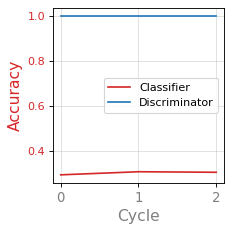

In [15]:
R.plot()